In [14]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Importing required packages for Dicision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Delhi Delights Data.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average Delivery Rating (a1)   30 non-null     float64
 1   Average Orders per month (a2)  30 non-null     int64  
 2   "Delighted Members" Purchase   30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [17]:
df.head()

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No


In [18]:
df['"Delighted Members" Purchase'] = pd.get_dummies(df['"Delighted Members" Purchase'], drop_first=True, dtype=int)

In [19]:
df

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,1
1,2.5,11,0
2,2.5,11,0
3,3.5,11,0
4,3.5,11,0
5,4.5,11,1
6,1.5,13,1
7,2.5,13,0
8,2.5,13,0
9,3.5,13,0


In [20]:
# Putting feature variable to X
y = df.pop('"Delighted Members" Purchase')

# Putting response variable to y
X = df

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((21, 2), (9, 2))

In [23]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

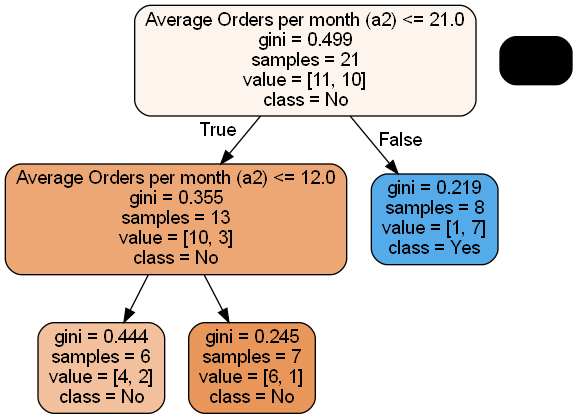

In [24]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No', "Yes"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [25]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [26]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8095238095238095


array([[10,  1],
       [ 3,  7]], dtype=int64)

In [27]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6666666666666666


array([[3, 1],
       [2, 3]], dtype=int64)